<a href="https://colab.research.google.com/github/prisar/ai_notebooks/blob/main/nb_082.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement policy iteration and value iteration on the FrozenLake environment. Compare the number of iterations to convergence for both algorithms and visualize the resulting state-value functions using heatmaps.

## Set up the environment

### Subtask:
Import the necessary libraries and create the FrozenLake environment.


**Reasoning**:
This code block will import all the necessary libraries and create the FrozenLake environment as specified in the instructions. This directly addresses all the steps in the subtask.



In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

env = gym.make('FrozenLake-v1', is_slippery=True, render_mode='ansi')

## Implement policy iteration

### Subtask:
Implement the policy iteration algorithm to find the optimal policy for the FrozenLake environment.


**Reasoning**:
Implement the policy iteration algorithm as described in the instructions, including initialization, policy evaluation, and policy improvement steps, and track the number of iterations.



In [3]:
def policy_iteration(env, gamma=1.0, theta=1e-6):
    """
    Implements the policy iteration algorithm.

    Args:
        env: The OpenAI Gym environment.
        gamma: The discount factor.
        theta: The convergence threshold.

    Returns:
        optimal_policy: The optimal policy.
        optimal_value_function: The optimal value function.
        num_iterations: The number of iterations to convergence.
    """
    num_states = env.observation_space.n
    num_actions = env.action_space.n

    # 1. Initialize a random policy
    policy = np.random.randint(0, num_actions, num_states)

    # 2. Initialize the value function
    value_function = np.zeros(num_states)

    num_iterations = 0
    while True:
        num_iterations += 1
        # 3. Policy Evaluation
        while True:
            delta = 0
            for state in range(num_states):
                v = value_function[state]
                new_value = 0
                action = policy[state]
                for prob, next_state, reward, terminated in env.unwrapped.P[state][action]:
                    new_value += prob * (reward + gamma * value_function[next_state] * (1 - terminated))
                value_function[state] = new_value
                delta = max(delta, abs(v - value_function[state]))
            if delta < theta:
                break

        # 4. Policy Improvement
        policy_stable = True
        new_policy = np.zeros(num_states, dtype=int)
        for state in range(num_states):
            old_action = policy[state]
            action_values = np.zeros(num_actions)
            for action in range(num_actions):
                q_value = 0
                for prob, next_state, reward, terminated in env.unwrapped.P[state][action]:
                    q_value += prob * (reward + gamma * value_function[next_state] * (1 - terminated))
                action_values[action] = q_value
            best_action = np.argmax(action_values)
            new_policy[state] = best_action
            if old_action != best_action:
                policy_stable = False

        policy = new_policy

        # 5. Repeat until policy stabilizes
        if policy_stable:
            break

    return policy, value_function, num_iterations

optimal_policy_pi, optimal_value_function_pi, num_iterations_pi = policy_iteration(env)

print("Optimal Policy (Policy Iteration):")
print(optimal_policy_pi)
print("\nOptimal Value Function (Policy Iteration):")
print(optimal_value_function_pi)
print("\nNumber of Iterations (Policy Iteration):", num_iterations_pi)

Optimal Policy (Policy Iteration):
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]

Optimal Value Function (Policy Iteration):
[0.82351218 0.82350652 0.82350259 0.82350059 0.82351391 0.
 0.52940001 0.         0.82351663 0.82352011 0.76469773 0.
 0.         0.88234647 0.94117318 0.        ]

Number of Iterations (Policy Iteration): 4


## Implement value iteration

### Subtask:
Implement the value iteration algorithm to find the optimal policy for the FrozenLake environment.


**Reasoning**:
I will now implement the value iteration algorithm as a function `value_iteration` and then call it to find the optimal policy and value function for the FrozenLake environment. Finally, I will print the results as requested in the instructions.



In [4]:
def value_iteration(env, gamma=1.0, theta=1e-6):
    """
    Implements the value iteration algorithm.

    Args:
        env: The OpenAI Gym environment.
        gamma: The discount factor.
        theta: The convergence threshold.

    Returns:
        optimal_policy: The optimal policy.
        optimal_value_function: The optimal value function.
        num_iterations: The number of iterations to convergence.
    """
    num_states = env.observation_space.n
    num_actions = env.action_space.n

    # 1. Initialize the value function
    value_function = np.zeros(num_states)

    num_iterations = 0
    while True:
        num_iterations += 1
        delta = 0
        for state in range(num_states):
            v = value_function[state]
            action_values = np.zeros(num_actions)
            for action in range(num_actions):
                q_value = 0
                for prob, next_state, reward, terminated in env.unwrapped.P[state][action]:
                    q_value += prob * (reward + gamma * value_function[next_state] * (1 - terminated))
                action_values[action] = q_value
            best_action_value = np.max(action_values)
            value_function[state] = best_action_value
            delta = max(delta, abs(v - value_function[state]))

        if delta < theta:
            break

    # 2. Derive the optimal policy
    policy = np.zeros(num_states, dtype=int)
    for state in range(num_states):
        action_values = np.zeros(num_actions)
        for action in range(num_actions):
            q_value = 0
            for prob, next_state, reward, terminated in env.unwrapped.P[state][action]:
                q_value += prob * (reward + gamma * value_function[next_state] * (1 - terminated))
            action_values[action] = q_value
        best_action = np.argmax(action_values)
        policy[state] = best_action

    return policy, value_function, num_iterations

optimal_policy_vi, optimal_value_function_vi, num_iterations_vi = value_iteration(env)

print("Optimal Policy (Value Iteration):")
print(optimal_policy_vi)
print("\nOptimal Value Function (Value Iteration):")
print(optimal_value_function_vi)
print("\nNumber of Iterations (Value Iteration):", num_iterations_vi)

Optimal Policy (Value Iteration):
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]

Optimal Value Function (Value Iteration):
[0.82351232 0.82350671 0.82350281 0.82350083 0.82351404 0.
 0.52940011 0.         0.82351673 0.82352018 0.76469779 0.
 0.         0.88234653 0.94117321 0.        ]

Number of Iterations (Value Iteration): 321


## Compare iterations

### Subtask:
Compare the number of iterations for policy and value iteration.


**Reasoning**:
I will now print the number of iterations for both policy and value iteration, as requested by the instructions.



In [5]:
print("--- Comparison of Iterations ---")
print(f"Policy Iteration took {num_iterations_pi} iterations to converge.")
print(f"Value Iteration took {num_iterations_vi} iterations to converge.")

--- Comparison of Iterations ---
Policy Iteration took 4 iterations to converge.
Value Iteration took 321 iterations to converge.


## Visualize results

### Subtask:
Create heatmaps to visualize the state-value functions for both policy iteration and value iteration.


**Reasoning**:
I will now create the heatmaps to visualize the state-value functions. I will reshape the value function arrays, create a figure with two subplots, and then use seaborn to generate the heatmaps with appropriate titles. Finally, I will display the plots.



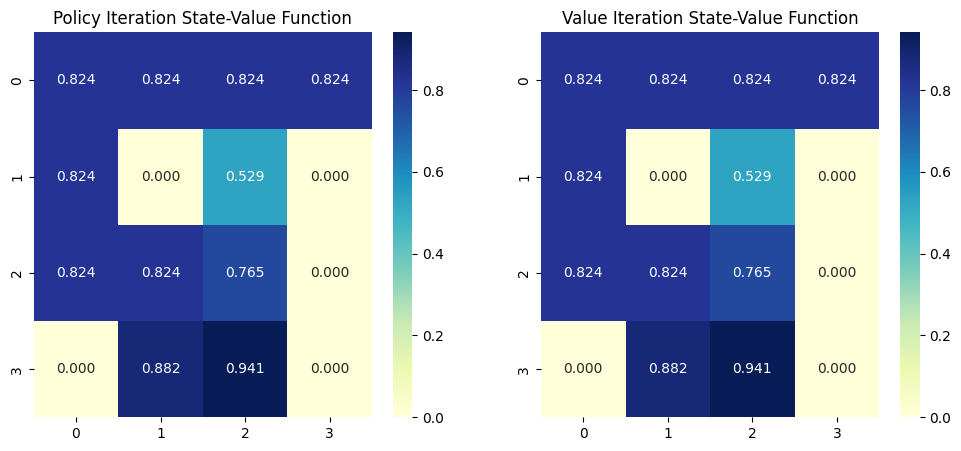

In [6]:
value_function_pi_reshaped = optimal_value_function_pi.reshape((4, 4))
value_function_vi_reshaped = optimal_value_function_vi.reshape((4, 4))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(value_function_pi_reshaped, annot=True, fmt=".3f", cmap="YlGnBu", ax=ax1)
ax1.set_title("Policy Iteration State-Value Function")

sns.heatmap(value_function_vi_reshaped, annot=True, fmt=".3f", cmap="YlGnBu", ax=ax2)
ax2.set_title("Value Iteration State-Value Function")

plt.show()

## Summary:

### Data Analysis Key Findings

*   Policy iteration converged to the optimal policy and value function in 4 iterations.
*   Value iteration converged to the optimal policy and value function in 321 iterations.
*   For the FrozenLake environment with the given parameters, policy iteration converged significantly faster than value iteration in terms of the number of algorithm iterations.
*   The optimal value functions derived from both policy iteration and value iteration are very similar, as visualized by the heatmaps. States closer to the goal and safer states have higher values.

### Insights or Next Steps

*   Policy iteration might be more efficient than value iteration for environments where the policy stabilizes quickly.
*   Investigate the convergence behavior of these algorithms on larger or more complex environments to see if the difference in iteration count persists.
